In [5]:
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [6]:
df = pd.read_csv("../Yoran/combined.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by=['Date'])
df = df.set_index(df.Date)
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,...,apr_temp,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,Belgium,2020-01-22,0,0,0,3/18/2020,5.0,1,2.0,7.0,...,8.145482,12.398000,15.434529,17.238529,17.183294,14.427412,10.678388,5.761971,3.113924,9.514241
2020-01-22,Denmark,2020-01-22,0,0,0,3/11/2020,5.0,1,10.0,3.0,...,5.867971,10.773036,14.401786,15.891429,15.902357,13.007679,9.359057,4.942146,1.645598,7.818978
2020-01-22,Japan,2020-01-22,2,0,0,4/7/2020,5.0,1,NaN,5.0,...,8.702060,13.524019,17.340918,21.338652,22.744000,18.757239,12.777206,7.053675,1.748080,10.362726
2020-01-22,Netherlands,2020-01-22,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,7.562913,11.983563,14.721875,16.550938,16.639875,13.895625,10.347350,5.916237,3.490613,9.201738
2020-01-22,Ukraine,2020-01-22,0,0,0,3/15/2020,5.7,1,2.0,5.3,...,9.085106,15.090398,18.421490,19.950162,19.344385,14.776107,8.625605,2.807330,-1.976805,8.205566


# 1. Feature engineering

##### Add columns

In [7]:
df['Month'] = df['Date'].map(lambda x: 100*x.month)
df = df.drop(['Date'],axis=1)
# df = df.drop(['Date','Country/Region'],axis=1)

## NaN handling

In [8]:
df.isna().any().any()

True

##### Code below is not necessary if we selected Netherlands

In [9]:
#Show all columns th§at contain Nan values
df.columns[df.isna().any()].tolist()

['maximum_together',
 'hosp_beds_per_1000_2017',
 'ICU-CCB_beds_per_100000',
 'sex_male_to_female_total',
 'first_school_closure_date',
 'airport_traffic_2018_thousands']

In [10]:
# See which countries has NaN values for "Maximum together"
print("{} has NaN value for maximum_together".format(df['Country/Region'][df.maximum_together.isna()].unique()))

# See which countries has NaN values for "hosp_beds_per_1000_2017"
print("{} has NaN value for hosp_beds_per_1000_2017".format(df['Country/Region'][df.hosp_beds_per_1000_2017.isna()].unique()))

# See which countries has NaN values for "CCB_beds_per_100000"
print("{} has NaN value for ICU-CCB_beds_per_100000".format(df['Country/Region'][df['ICU-CCB_beds_per_100000'].isna()].unique()))

# See which countries has NaN values for "sex_male_to_female_total"
print("{} has NaN value for sex_male_to_female_total".format(df['Country/Region'][df.sex_male_to_female_total.isna()].unique()))

#See which country has Nan values for "first_school_closure_date"
print("{} has NaN value for first_school_closure_data_column".format(df['Country/Region'][df.first_school_closure_date.isna()].unique()))

# See which countries has NaN values for "airport_traffic_2018_thousands"
print("{} has NaN value for airport_traffic_2018_thousands".format(df['Country/Region'][df.airport_traffic_2018_thousands.isna()].unique()))


['Japan' 'Croatia'] has NaN value for maximum_together
['Ukraine' 'Croatia' 'North Macedonia'] has NaN value for hosp_beds_per_1000_2017
['Ukraine' 'Croatia' 'Israel' 'North Macedonia'] has NaN value for ICU-CCB_beds_per_100000
['North Macedonia'] has NaN value for sex_male_to_female_total
['United Kingdom'] has NaN value for first_school_closure_data_column
['Denmark' 'North Macedonia'] has NaN value for airport_traffic_2018_thousands


In [11]:
#See with which country this NaN can be replaced
df['Country/Region'].unique()

array(['Belgium', 'Denmark', 'Japan', 'Netherlands', 'Ukraine',
       'Slovenia', 'Germany', 'Ireland', 'United Kingdom', 'Switzerland',
       'Croatia', 'Israel', 'Italy', 'North Macedonia', 'France'],
      dtype=object)

In [12]:
df['maximum_together'][df['Country/Region']=="Croatia"] = df['maximum_together'][df['Country/Region']=="Croatia"].fillna(df['maximum_together'][df['Country/Region']=="Slovenia"])

In [13]:
#Replace NaNs from Croatia with maximum_together from Slovenia 
df['maximum_together'][df['Country/Region']=="Croatia"] = df['maximum_together'][df['Country/Region']=="Croatia"].fillna(df['maximum_together'][df['Country/Region']=="Slovenia"])

#Replace NaNs in maximum_together column in Japan with max value from all columns 
df['maximum_together'] = df['maximum_together'].fillna(df['maximum_together'].max())

#Replace Nans for hosp_beds_per_1000_2017 Ukraine with mean value 
df['hosp_beds_per_1000_2017'][df['Country/Region']=="Ukraine"] = df['hosp_beds_per_1000_2017'][df['Country/Region']=="Ukraine"].fillna(df['hosp_beds_per_1000_2017'].mean())
#Replace Nans for hosp_beds_per_1000_2017 Croatia with values from Slovenia
df['hosp_beds_per_1000_2017'][df['Country/Region']=="Croatia"] = df['hosp_beds_per_1000_2017'][df['Country/Region']=="Croatia"].fillna(df['hosp_beds_per_1000_2017'][df['Country/Region']=="Slovenia"])
#Replace Nans for hosp_beds_per_1000_2017 North Macedonia with values from Slovenia
df['hosp_beds_per_1000_2017'][df['Country/Region']=="North Macedonia"] = df['hosp_beds_per_1000_2017'][df['Country/Region']=="North Macedonia"].fillna(df['hosp_beds_per_1000_2017'][df['Country/Region']=="Slovenia"])

#Replace Nans for ICU-CCB_beds_per_100000 Ukraine with mean value 
df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Ukraine"] = df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Ukraine"].fillna(df['ICU-CCB_beds_per_100000'].mean())
#Replace Nans for ICU-CCB_beds_per_100000 Croatia with values from Slovenia
df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Croatia"] = df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Croatia"].fillna(df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Slovenia"])
#Replace Nans for ICU-CCB_beds_per_100000 North Macedonia with values from Slovenia
df['ICU-CCB_beds_per_100000'][df['Country/Region']=="North Macedonia"] = df['ICU-CCB_beds_per_100000'][df['Country/Region']=="North Macedonia"].fillna(df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Slovenia"])
#Replace Nans for ICU-CCB_beds_per_100000 Israel with mean
df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Israel"] = df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Israel"].fillna(df['ICU-CCB_beds_per_100000'].mean())

#Replace Nans for sex_male_to_female_total North Macedonia with values from Slovenia
df['sex_male_to_female_total'][df['Country/Region']=="North Macedonia"] = df['sex_male_to_female_total'][df['Country/Region']=="North Macedonia"].fillna(df['sex_male_to_female_total'][df['Country/Region']=="Slovenia"])

#Replace Nans for first_school_closure_date UK with values from Ireland
df['first_school_closure_date'] = df['first_school_closure_date'].fillna(df['first_school_closure_date'][df['Country/Region'] == "Ireland"][0])

#Replace Nans for airport_traffic_2018_thousands Denmark with values from Germany
df['airport_traffic_2018_thousands'][df['Country/Region']=="Denmark"] = df['airport_traffic_2018_thousands'][df['Country/Region']=="Denmark"].fillna(df['airport_traffic_2018_thousands'][df['Country/Region']=="Germany"])
#Replace Nans for first_school_closure_date North Macedonai with values from Ireland
df['airport_traffic_2018_thousands'][df['Country/Region']=="North Macedonia"] = df['airport_traffic_2018_thousands'][df['Country/Region']=="North Macedonia"].fillna(df['airport_traffic_2018_thousands'][df['Country/Region']=="Slovenia"])

In [14]:
#Check if all NaN's are correctly replaced
df.isna().any().any()

False

In [15]:
df.to_csv("df_FE.csv")

# 2. Feature selection

In [69]:
df = pd.read_csv("df_FE.csv")
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,...,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Month
0,2020-01-22,Belgium,0,0,0,3/18/2020,5.0,1,2.0,7.0,...,12.398000,15.434529,17.238529,17.183294,14.427412,10.678388,5.761971,3.113924,9.514241,100
1,2020-01-22,Denmark,0,0,0,3/11/2020,5.0,1,10.0,3.0,...,10.773036,14.401786,15.891429,15.902357,13.007679,9.359057,4.942146,1.645598,7.818978,100
2,2020-01-22,Japan,2,0,0,4/7/2020,5.0,1,10.0,5.0,...,13.524019,17.340918,21.338652,22.744000,18.757239,12.777206,7.053675,1.748080,10.362726,100
3,2020-01-22,Netherlands,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.347350,5.916237,3.490613,9.201738,100
4,2020-01-22,Ukraine,0,0,0,3/15/2020,5.7,1,2.0,5.3,...,15.090398,18.421490,19.950162,19.344385,14.776107,8.625605,2.807330,-1.976805,8.205566,100


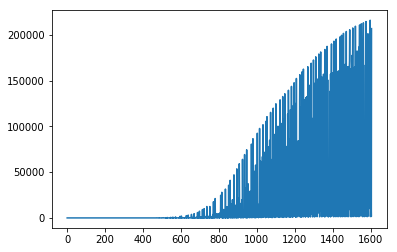

In [17]:
#Check if data is still sorted by date
plt.plot(df.Confirmed)

##### Code below not necessary if we only selected Netherlands

In [72]:
# df = pd.read_csv("df_FE.csv")
# df.Date = pd.to_datetime(df.Date)
# df = df.sort_values(by=['Date'])
# df = df.set_index(df.Date)
nl = df[df['Country/Region']=="Netherlands"]
nl

,Date,Country/Region,Confirmed,Deaths,Recovered,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,...,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Month
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,Netherlands,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-23,2020-01-23,Netherlands,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-24,2020-01-24,Netherlands,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-25,2020-01-25,Netherlands,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-26,2020-01-26,Netherlands,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-27,2020-01-27,Netherlands,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-28,2020-01-28,Netherlands,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-29,2020-01-29,Netherlands,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-30,2020-01-30,Netherlands,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100


In [19]:
# #Put target columns to front
cols =  df.columns
cols = list(cols[2:5]) + list(cols[0:2]) + list(cols[5:])
df = df[cols]
df.head()

,Confirmed,Deaths,Recovered,Date,Country/Region,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,...,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Month
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,2020-01-22,Belgium,3/18/2020,5.0,1,2.0,7.0,...,12.398000,15.434529,17.238529,17.183294,14.427412,10.678388,5.761971,3.113924,9.514241,100
2020-01-22,0,0,0,2020-01-22,France,3/16/2020,7.1,1,2.0,7.4,...,12.717758,16.097942,18.603865,18.228694,15.782718,11.746692,6.690055,3.865740,10.543722,100
2020-01-22,0,0,0,2020-01-22,North Macedonia,3/19/2020,7.0,1,2.0,5.0,...,13.985727,17.421182,19.846727,19.731727,16.310454,10.784882,5.366073,0.732434,9.853518,100
2020-01-22,0,0,0,2020-01-22,Italy,3/10/2020,8.0,1,1.0,8.0,...,13.777579,17.524698,20.305087,20.144344,17.185813,12.856856,8.012446,4.398412,11.500694,100
2020-01-22,0,0,0,2020-01-22,Israel,4/2/2020,9.0,1,4.0,10.0,...,21.895714,24.751714,26.449429,26.681571,25.123857,22.219000,17.569286,13.401857,19.698000,100


In [44]:
# nl = df[df['Country/Region']=="Netherlands"]
# nl.to_csv("NL_df.csv")

##### Auto encode columns with dtype object

In [73]:
df = pd.read_csv('NL_df.csv')
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by=['Date'])
df = df.set_index(df.Date)
df = df.drop(['Date.1','Date','Country/Region'],axis=1)
df.head()

,Confirmed,Deaths,Recovered,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,government_performance,kindergarten_open_to_vital,...,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Month
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,3/23/2020,5.0,0,3.0,7.0,8.0,1,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-23,0,0,0,3/23/2020,5.0,0,3.0,7.0,8.0,1,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-24,0,0,0,3/23/2020,5.0,0,3.0,7.0,8.0,1,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-25,0,0,0,3/23/2020,5.0,0,3.0,7.0,8.0,1,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-26,0,0,0,3/23/2020,5.0,0,3.0,7.0,8.0,1,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100


In [74]:
#Show which columns have dtype object
for i in df.columns: 
    if df[i].dtype == object:
        print(i)

start_date
covid19_first_date
Urban_pop_pct
first_school_closure_date


In [75]:
label_encoder = LabelEncoder()
# df['Country/Region'] = label_encoder.fit_transform(df['Country/Region']).astype('float64')
df['start_date'] = label_encoder.fit_transform(df['start_date']).astype('float64')
df['covid19_first_date'] = label_encoder.fit_transform(df['covid19_first_date']).astype('float64')
df['first_school_closure_date'] = label_encoder.fit_transform(df['first_school_closure_date']).astype('float64')
df['Urban_pop_pct'] = df['Urban_pop_pct'].map(lambda x: x.lstrip('%').rstrip('%')).astype(float)/100

In [23]:
# Show all dtypes 
# df.info()

##### Convert all dtypes to a float value

In [33]:
# df = df.drop(['Date'],axis=1)
# df = df.drop(['Date1'],axis=1)

In [76]:
df = df.apply(pd.to_numeric)
df = df.astype(float)
# df.info()

##### Drop columns that are useless and have no variable values

In [77]:
for i in df.columns: 
    if df[i].max() == df[i].mean():
        df = df.drop([i],axis=1)

##### Store DF

In [26]:
df.to_csv("df_num.csv")

## FROM HERE

In [29]:
df = pd.read_csv('df_num.csv')
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by=['Date'])
df = df.set_index(df.Date)
df = df.drop(['Date'],axis=1)
df.head()

,Confirmed,Deaths,Recovered,Date.1,Country/Region,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,...,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Month
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,1.579651e+18,0.0,5.0,5.0,1.0,2.0,7.0,...,12.398000,15.434529,17.238529,17.183294,14.427412,10.678388,5.761971,3.113924,9.514241,100.0
2020-01-22,0.0,0.0,0.0,1.579651e+18,5.0,9.0,6.8,1.0,3.0,7.8,...,10.073630,12.799054,14.526135,14.276838,12.459108,10.081162,6.610897,5.446403,9.107924,100.0
2020-01-22,0.0,0.0,0.0,1.579651e+18,2.0,1.0,5.0,1.0,10.0,3.0,...,10.773036,14.401786,15.891429,15.902357,13.007679,9.359057,4.942146,1.645598,7.818978,100.0
2020-01-22,2.0,0.0,0.0,1.579651e+18,8.0,11.0,5.0,1.0,10.0,5.0,...,13.524019,17.340918,21.338652,22.744000,18.757239,12.777206,7.053675,1.748080,10.362726,100.0
2020-01-22,0.0,0.0,0.0,1.579651e+18,9.0,8.0,5.0,0.0,3.0,7.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.347350,5.916237,3.490613,9.201738,100.0


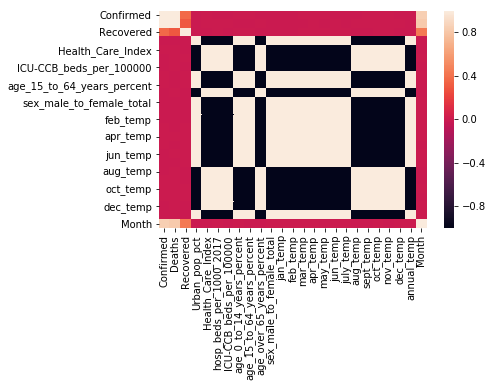

In [78]:
# plt.figure(figsize=(59,59))
sns.heatmap(df.corr())

# Klooien met correlations

In [39]:
df.iloc[:,3:]

,Date.1,Country/Region,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,government_performance,kindergarten_open_to_vital,highschool_open_to_vital,...,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Month
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,1.579651e+18,0.0,5.0,5.0,1.0,2.0,7.0,6.0,1.0,0.0,...,12.398000,15.434529,17.238529,17.183294,14.427412,10.678388,5.761971,3.113924,9.514241,100.0
2020-01-22,1.579651e+18,5.0,9.0,6.8,1.0,3.0,7.8,8.8,0.0,0.0,...,10.073630,12.799054,14.526135,14.276838,12.459108,10.081162,6.610897,5.446403,9.107924,100.0
2020-01-22,1.579651e+18,2.0,1.0,5.0,1.0,10.0,3.0,5.0,0.0,0.0,...,10.773036,14.401786,15.891429,15.902357,13.007679,9.359057,4.942146,1.645598,7.818978,100.0
2020-01-22,1.579651e+18,8.0,11.0,5.0,1.0,10.0,5.0,4.0,1.0,0.0,...,13.524019,17.340918,21.338652,22.744000,18.757239,12.777206,7.053675,1.748080,10.362726,100.0
2020-01-22,1.579651e+18,9.0,8.0,5.0,0.0,3.0,7.0,8.0,1.0,1.0,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.347350,5.916237,3.490613,9.201738,100.0
2020-01-22,1.579651e+18,11.0,3.0,7.5,1.0,2.0,8.0,8.0,0.0,0.0,...,12.163411,15.398967,17.378222,16.942333,13.865478,9.208933,3.580752,-0.791111,8.040211,100.0
2020-01-22,1.579651e+18,4.0,7.0,6.0,1.0,2.0,7.0,8.0,1.0,1.0,...,12.273226,15.496893,17.188080,16.968642,13.902305,9.431784,4.270517,0.880768,8.504452,100.0
2020-01-22,1.579651e+18,13.0,2.0,5.7,1.0,2.0,5.3,4.4,0.0,0.0,...,15.090398,18.421490,19.950162,19.344385,14.776107,8.625605,2.807330,-1.976805,8.205566,100.0
2020-01-22,1.579651e+18,14.0,8.0,7.0,1.0,2.0,7.5,7.0,1.0,0.0,...,9.815439,12.765885,14.435399,14.286812,12.213888,9.472010,5.524062,3.849172,8.310239,100.0


In [40]:
labels = df.iloc[:,3:]
targetC = df.iloc[:,0]
targetD = df.iloc[:,1]
targetR = df.iloc[:,2]

In [61]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
X, y = labels,targetD

In [62]:
# apply SelectKBest class to extract top 10 best features
# ConfirmedBest = []
DeathBest = []
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
DeathBest.append(featureScores.nlargest(10,'Score'))

                                 Specs       Score
0                               Date.1  322.055605
55                               Month  286.124622
39           first_school_closure_date  113.497598
24               protection_Not at all   99.199287
29                     Population_2020   78.441749
5                     maximum_together   67.777948
41                     gdp_usd_million   67.503711
27  protection_Sufficient for everyone   65.957686
20     kindergarten_closed_to_everyone   47.907523
2                           start_date   47.595869


In [66]:
list(ConfirmedBest[0].iloc[:,0])

['Date.1',
 'Month',
 'first_school_closure_date',
 'ICU-CCB_beds_per_100000',
 'gdp_usd_million',
 'Population_2020',
 'protection_Sufficient for everyone',
 'kindergarten_closed_to_everyone',
 'protection_Not at all',
 'maximum_together']

In [67]:
list(DeathBest[0].iloc[:,0])

['Date.1',
 'Month',
 'first_school_closure_date',
 'protection_Not at all',
 'Population_2020',
 'maximum_together',
 'gdp_usd_million',
 'protection_Sufficient for everyone',
 'kindergarten_closed_to_everyone',
 'start_date']

# Feature importance

[8.28697626e-01 3.37792462e-04 3.38958079e-04 4.57864294e-04
 5.04382732e-05 5.56461854e-05 7.19785786e-04 4.91682143e-04
 4.66101349e-04 0.00000000e+00 6.17416669e-05 5.75554135e-04
 2.03560405e-04 0.00000000e+00 0.00000000e+00 7.93037410e-05
 3.23887588e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.32805725e-04 1.95078721e-04 3.22842997e-04 2.54450506e-05
 6.59387271e-04 9.16021821e-05 2.36753343e-04 8.84176486e-04
 1.30830523e-03 1.24937487e-03 2.47370735e-04 8.33629270e-04
 8.55891328e-05 1.33586516e-04 4.19267837e-04 1.01757398e-03
 6.40134087e-04 2.07322114e-03 5.34533638e-04 8.67414448e-04
 4.82980353e-04 2.64583482e-03 6.64656035e-04 1.07062420e-03
 4.09419538e-04 5.15803229e-04 5.97660437e-04 4.84611010e-04
 5.12468075e-05 3.04125163e-04 2.46185328e-03 1.88300154e-03
 7.92006891e-04 5.20636074e-04 2.46789014e-04 1.42050717e-01]


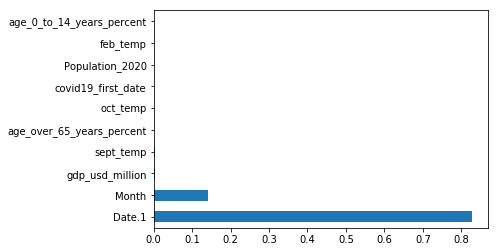

In [68]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [48]:
import sklearn
# sklearn.feature_selection.f_classif(X, y)
sklearn.feature_selection.f_regression(X, y,center=True)
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

(array([4.81340816e+02, 1.78721201e+00, 2.92659388e+01, 1.05690381e+01,
        2.72709059e+00, 7.08635147e+01, 2.27736369e+01, 2.62703971e-01,
        3.57879078e+01, 3.01990989e+00, 1.92360103e+01, 1.32098723e+01,
        1.32667204e+01, 1.12286458e+01, 2.23743749e+00, 1.48252102e+01,
        1.61636231e+01, 1.07009105e+01, 1.48252102e+01, 1.33637274e+01,
        8.68427566e+01, 3.04731048e+01, 6.04327962e+01, 1.33637274e+01,
        7.64997114e+01, 1.26324352e+01, 1.53073346e+00, 9.29250923e+01,
        6.76339321e+01, 1.36452543e+02, 3.28808821e+00, 3.52591033e+00,
        3.73591521e+01, 4.34454594e-02, 1.44040705e+02, 4.09360989e+01,
        8.00254517e+00, 7.08618603e+01, 1.34641037e+00, 1.83095757e+02,
        2.76752737e+01, 1.43419342e+02, 1.95009107e+01, 1.56222385e+01,
        5.53786304e+00, 2.06254877e+00, 7.85208412e+00, 5.73570665e+00,
        3.35190645e+00, 4.57484002e+00, 1.57632973e+00, 7.54513553e-04,
        4.80300157e-01, 7.79342506e+00, 1.35978517e-01, 4.218097

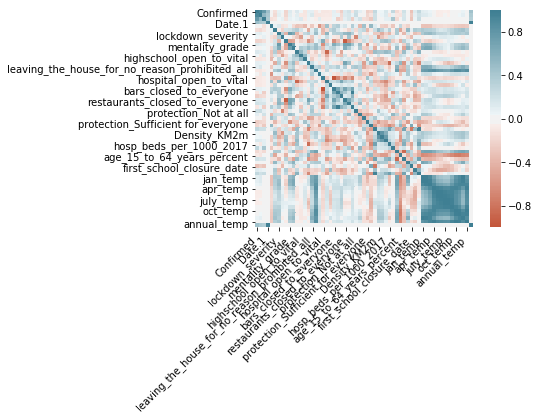

In [30]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [143]:
# sns.set(style="white")
# # Create a covariance matrix
# corr = df.corr()
# # Creating a mask the size of our covariance matrix
# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11,9))
# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220,10,as_cmap=True)
# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
#             linewidth=.5, cbar_kws={'shrink': .5})
# # ax.set_title('Multi-Collinearity of Features')
# # plt.savefig('correlation2.png')

In [118]:
labels = df.iloc[:,3]
targetC = df.iloc[:,0]
targetD = df.iloc[:,1]
targetR = df.iloc[:,2]

In [120]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X,y = labels, targetC
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
# X_selected = fs.fit_transform(X, y)
# print(X_selected.shape)

In [121]:
X_selected = fs.fit_transform(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[1.5796512e+18 1.5796512e+18 1.5796512e+18 ... 1.5888096e+18 1.5888096e+18
 1.5888096e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [159]:
corr_matrix = df.corr()
corr_matrix["Confirmed"].sort_values(ascending=False)
# sns.heatmap(corr_matrix)

Confirmed                                           1.000000
Deaths                                              0.918185
Recovered                                           0.782063
Date                                                0.480554
Month                                               0.456422
ICU-CCB_beds_per_100000                             0.287138
gdp_usd_million                                     0.286569
Population_2020                                     0.280082
protection_Not at all                               0.213422
age_over_65_years_percent                           0.205753
shops_other_than_supermarkets_closed_to_everyone    0.190605
Health_Care_Index                                   0.150914
kindergarten_open_to_vital                          0.147777
restaurants_closed_to_everyone                      0.136585
airport_traffic_2018_thousands                      0.130275
mentality_grade                                     0.118355
jan_temp                

##### Compare correlation between features

In [156]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
dfNew = df[selected_columns] 
dfNew

,Confirmed,Recovered,Date,Country/Region,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,government_performance,...,hosp_beds_per_1000_2017,ICU-CCB_beds_per_100000,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,sex_male_to_female_total,first_school_closure_date,airport_traffic_2018_thousands,jan_temp,apr_temp
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,1.579651e+18,0.0,5.0,5.0,1.0,2.0,7.0,6.0,...,5.760000,15.900000,17.1,64.3,18.6,0.97,6.0,13639487.0,1.946864,8.145482
2020-01-22,0.0,0.0,1.579651e+18,3.0,3.0,7.1,1.0,2.0,7.4,7.4,...,5.980000,11.600000,18.1,62.2,19.7,0.96,2.0,70188028.0,3.109365,9.096851
2020-01-22,0.0,0.0,1.579651e+18,10.0,6.0,7.0,1.0,2.0,5.0,7.0,...,4.500000,6.400000,23.7,64.4,11.9,0.95,4.0,1094762.0,-0.983334,9.233964
2020-01-22,0.0,0.0,1.579651e+18,7.0,0.0,8.0,1.0,1.0,8.0,6.4,...,3.180000,12.500000,13.5,63.5,23.0,0.93,0.0,27630436.0,3.318792,9.612692
2020-01-22,0.0,0.0,1.579651e+18,6.0,10.0,9.0,1.0,4.0,10.0,10.0,...,3.020000,10.272727,27.9,60.4,11.7,1.01,5.0,7404373.0,11.793429,18.818000
2020-01-22,0.0,0.0,1.579651e+18,12.0,4.0,8.0,1.0,5.0,9.0,7.0,...,4.530000,11.000000,14.9,66.7,18.4,0.97,5.0,28857994.0,-3.237039,3.347776
2020-01-22,0.0,0.0,1.579651e+18,14.0,8.0,7.0,1.0,2.0,7.5,7.0,...,2.540000,6.600000,17.7,63.8,18.5,0.99,5.0,165000000.0,2.993382,6.742380
2020-01-22,0.0,0.0,1.579651e+18,1.0,5.0,8.0,1.0,2.0,8.0,9.0,...,4.500000,6.400000,14.7,65.6,19.7,0.93,5.0,2093577.0,-0.159052,10.247004
2020-01-22,0.0,0.0,1.579651e+18,4.0,7.0,6.0,1.0,2.0,7.0,8.0,...,8.000000,29.200000,13.1,65.5,21.5,0.97,2.0,110000000.0,-0.477574,7.687484


In [157]:
corr_matrix = dfNew.corr()
corr_matrix["Confirmed"].sort_values(ascending=False)

Confirmed                                           1.000000
Recovered                                           0.782063
Date                                                0.480554
ICU-CCB_beds_per_100000                             0.287138
Population_2020                                     0.280082
protection_Not at all                               0.213422
age_over_65_years_percent                           0.205753
shops_other_than_supermarkets_closed_to_everyone    0.190605
Health_Care_Index                                   0.150914
kindergarten_open_to_vital                          0.147777
restaurants_closed_to_everyone                      0.136585
airport_traffic_2018_thousands                      0.130275
mentality_grade                                     0.118355
jan_temp                                            0.109631
bars_closed_to_everyone                             0.095727
leaving_the_house_for_no_reason_prohibited_all      0.090599
going_out_for_dinner_pro

In [101]:
dfNew['Deaths'] = df['Deaths']
cols = list(dfNew.columns)
cols = [cols[-1]] + cols[:-1]
dfNew = dfNew[cols]
dfNew.head()

,Deaths,Confirmed,Recovered,Date,Country/Region,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,...,hosp_beds_per_1000_2017,ICU-CCB_beds_per_100000,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,sex_male_to_female_total,first_school_closure_date,airport_traffic_2018_thousands,jan_temp,apr_temp
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,1.579651e+18,0.0,5.0,5.0,1.0,2.0,7.0,...,5.76,15.900000,17.1,64.3,18.6,0.97,6.0,13639487.0,1.946864,8.145482
2020-01-22,0.0,0.0,0.0,1.579651e+18,3.0,3.0,7.1,1.0,2.0,7.4,...,5.98,11.600000,18.1,62.2,19.7,0.96,2.0,70188028.0,3.109365,9.096851
2020-01-22,0.0,0.0,0.0,1.579651e+18,10.0,6.0,7.0,1.0,2.0,5.0,...,4.50,6.400000,23.7,64.4,11.9,0.95,4.0,1094762.0,-0.983334,9.233964
2020-01-22,0.0,0.0,0.0,1.579651e+18,7.0,0.0,8.0,1.0,1.0,8.0,...,3.18,12.500000,13.5,63.5,23.0,0.93,0.0,27630436.0,3.318792,9.612692
2020-01-22,0.0,0.0,0.0,1.579651e+18,6.0,10.0,9.0,1.0,4.0,10.0,...,3.02,10.272727,27.9,60.4,11.7,1.01,5.0,7404373.0,11.793429,18.818000


In [98]:
# df.head()
dfNew.to_csv("Corrected_df.csv")

# Select columns based on P-value

##### Remove columns that you want to predict

Remove Confirmed, Death and Recovered column you want to predict those

In [347]:
corrected = pd.read_csv("Corrected_df.csv")

In [17]:
selected_columns2

['Country/Region',
 'Date',
 'start_date',
 'lockdown_severity',
 'leasure_shopping_prohibited',
 'maximum_together',
 'mentality_grade',
 'government_performance',
 'kindergarten_open_to_vital',
 'highschool_open_to_vital',
 'university_open_to_vital',
 'going_out_for_dinner_prohibited_all',
 'leaving_the_house_for_no_reason_prohibited_all',
 'public_transportation_prohibited_all',
 'sports_games_prohibited_all',
 'hospital_open_to_vital',
 'none_open_to_vital',
 'none__open_to_vital',
 'bars_closed_to_everyone',
 'highschool_closed_to_everyone',
 'kindergarten_closed_to_everyone',
 'restaurants_closed_to_everyone',
 'shops_other_than_supermarkets_closed_to_everyone',
 'protection_Not at all',
 'protection_Only for any healthcare worker',
 'protection_Only for hospital staff',
 'protection_Sufficient for everyone',
 'covid19_first_date',
 'Population_2020',
 'Density_KM2m',
 'Urban_pop_pct',
 'Health_Care_Index',
 'hosp_beds_per_1000_2017',
 'ICU-CCB_beds_per_100000',
 'age_0_to_14_ye

In [12]:
label_columns = []
label_columns.append(list(selected_columns[0:2]))
label_columns = [item for sublist in label_columns for item in sublist]
label_columns.append(dfNew.columns[0])
label_columns

selected_columns2 = list(selected_columns[2:])
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)                  
    regressor_OLS.summary()
    return x, columns
SL = 0.05

#for confirmed caes
data_modeled, selected_columns3 = backwardElimination(dfNew.iloc[:,3:].values, df.iloc[:,0].values, SL, selected_columns2)

In [13]:
result = pd.DataFrame()
result['Confirmed'] = dfNew.iloc[:,2]
result['Recovered'] = df.iloc[:,1]
result['Death'] = dfNew.iloc[:,0]

In [18]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns3)

In [26]:
data[data.index.duplicated()]

,Country/Region,Date,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,government_performance,kindergarten_open_to_vital,highschool_open_to_vital,...,Health_Care_Index,hosp_beds_per_1000_2017,ICU-CCB_beds_per_100000,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,sex_male_to_female_total,first_school_closure_date,jan_temp,apr_temp


In [24]:
sns.distplot(data.iloc[0][result['Confirmed']==0], color='g', label = 'benign')

ValueError: cannot reindex from a duplicate axis

TypeError: Cannot index by location index with a non-integer key

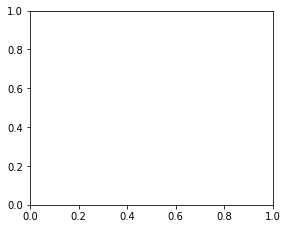

In [23]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data.iloc[i][result['Confirmed']==0], color='g', label = 'benign')
#     sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

##### Visualize the selected features

# Breast cancer

In [15]:
bc = pd.read_csv("data.csv")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
bc = bc.iloc[:,1:-1]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


##### Transform categorical to numerical

In [17]:
label_encoder = LabelEncoder()
bc.iloc[:,0] = label_encoder.fit_transform(bc.iloc[:,0]).astype('float64')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


##### Set correlation matrix

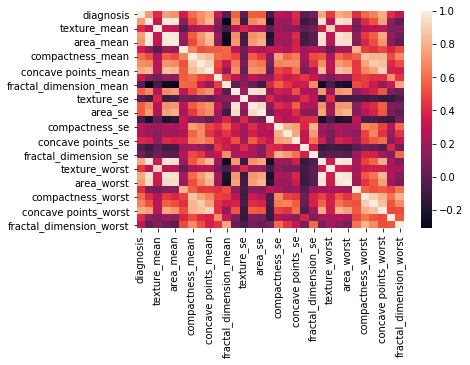

In [18]:
corr = bc.corr()
sns.heatmap(corr)

In [20]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = bc.columns[columns]
bc = bc[selected_columns]

In [24]:
selected_columns = list(selected_columns[1:])
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(bc.iloc[:,1:].values, bc.iloc[:,0].values, SL, selected_columns)

In [26]:
result = pd.DataFrame()
result['diagnosis'] = bc.iloc[:,0]

In [27]:
bc.iloc[:,1:].values

array([[17.99   , 10.38   ,  0.1184 , ...,  0.7119 ,  0.4601 ,  0.1189 ],
       [20.57   , 17.77   ,  0.08474, ...,  0.2416 ,  0.275  ,  0.08902],
       [19.69   , 21.25   ,  0.1096 , ...,  0.4504 ,  0.3613 ,  0.08758],
       ...,
       [16.6    , 28.08   ,  0.08455, ...,  0.3403 ,  0.2218 ,  0.0782 ],
       [20.6    , 29.33   ,  0.1178 , ...,  0.9387 ,  0.4087 ,  0.124  ],
       [ 7.76   , 24.54   ,  0.05263, ...,  0.     ,  0.2871 ,  0.07039]])

In [29]:
df.iloc[:,3:].values

array([[Timestamp('2020-01-22 00:00:00'), '3/18/2020', 5.0, ...,
        5.76197057647, 3.11392355706, 9.51424127412],
       [Timestamp('2020-01-23 00:00:00'), '3/18/2020', 5.0, ...,
        5.76197057647, 3.11392355706, 9.51424127412],
       [Timestamp('2020-01-24 00:00:00'), '3/18/2020', 5.0, ...,
        5.76197057647, 3.11392355706, 9.51424127412],
       ...,
       [Timestamp('2020-05-05 00:00:00'), '3/23/2020', 7.0, ...,
        5.52406241519, 3.84917216872, 8.3102391391],
       [Timestamp('2020-05-06 00:00:00'), '3/23/2020', 7.0, ...,
        5.52406241519, 3.84917216872, 8.3102391391],
       [Timestamp('2020-05-07 00:00:00'), '3/23/2020', 7.0, ...,
        5.52406241519, 3.84917216872, 8.3102391391]], dtype=object)